In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os

base_dir = "/content/drive/MyDrive/SystemC_Pi_Comparison"
os.makedirs(base_dir, exist_ok=True)

os.chdir(base_dir)
print("Working directory:", os.getcwd())


Working directory: /content/drive/MyDrive/SystemC_Pi_Comparison


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pi = pd.read_csv("perf_log.csv")
sc = pd.read_csv("latency_sc.csv")

print("Frames Pi:", len(pi))
print("Frames SystemC:", len(sc))


Frames Pi: 336
Frames SystemC: 61


In [11]:
N = len(sc)
pi_cut = pi.head(N).copy()

print("Frames Pi (cut):", len(pi_cut))



Frames Pi (cut): 61


In [12]:
cols = ['t_cam','t_pp','t_det_s','t_det_e','t_dec','t_aud']
pi_cut[cols] = pi_cut[cols] * 1000.0

def compute_fps_from_tcam(t_ms):
    dt = np.diff(t_ms)
    dt = dt[dt > 1]          # lọc nhiễu timestamp rất nhỏ
    return 1000.0 / np.mean(dt)

fps_pi = compute_fps_from_tcam(pi_cut["t_cam"].values)
fps_sc = compute_fps_from_tcam(sc["cam_ms"].values)

print(f"FPS Pi (cut)     : {fps_pi:.2f}")
print(f"FPS SystemC      : {fps_sc:.2f}")


FPS Pi (cut)     : 6.70
FPS SystemC      : 4.07


In [13]:
pi_inf = pi_cut[pi_cut["ran_infer"] == 1]
pi_det_lat = pi_inf["t_det_e"] - pi_inf["t_det_s"]

sc_inf = sc[sc["ran_infer"] == 1]
sc_det_lat = sc_inf["det_ms"] - sc_inf["cam_ms"]

print("Pi inference latency:")
print("  p50 =", np.percentile(pi_det_lat, 50))
print("  p95 =", np.percentile(pi_det_lat, 95))

print("SystemC inference latency:")
print("  p50 =", np.percentile(sc_det_lat, 50))
print("  p95 =", np.percentile(sc_det_lat, 95))


Pi inference latency:
  p50 = 290.0
  p95 = 318.5000000000001
SystemC inference latency:
  p50 = 50.07999999999993
  p95 = 292.0


In [14]:
pi_inf = pi_cut[pi_cut["ran_infer"] == 1]

(pi_inf["t_det_e"] - pi_inf["t_det_s"]).value_counts().head()


,count
290.0,11
300.0,6
480.0,1
310.0,1
280.0,1


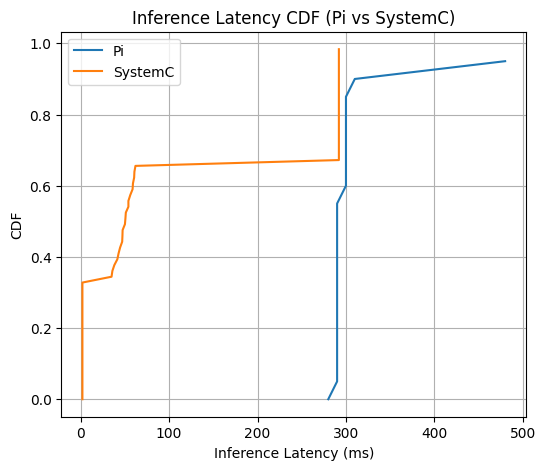

In [15]:
plt.figure(figsize=(6,5))

for label, data in [
    ("Pi", pi_det_lat),
    ("SystemC", sc_det_lat)
]:
    x = np.sort(data)
    y = np.arange(len(x)) / len(x)
    plt.plot(x, y, label=label)

plt.xlabel("Inference Latency (ms)")
plt.ylabel("CDF")
plt.title("Inference Latency CDF (Pi vs SystemC)")
plt.legend()
plt.grid(True)

plt.show()


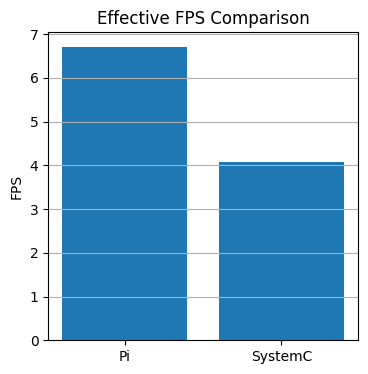

In [16]:
plt.figure(figsize=(4,4))
plt.bar(["Pi", "SystemC"], [fps_pi, fps_sc])
plt.ylabel("FPS")
plt.title("Effective FPS Comparison")
plt.grid(axis="y")
plt.show()
